# 

# Focused on indervidual events

Looking at single events, drawn from the G4 data, and produced by a model.

Viewing events produced by the model is mostly a sanity check.

While looking at the G4 data a common need is to check for anomalous data. This is done with the help pf functions in `pointcloud.utils.clean_data`.

## Start with imports and config

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pointcloud.config_varients.wish import Configs
from pointcloud.config_varients.wish_maxwell import Configs as MaxwellConfigs
from pointcloud.config_varients.default import Configs as DefaultConfigs

from pointcloud.data.read_write import read_raw_regaxes, get_n_events
from pointcloud.data.dataset import dataset_class_from_config
from pointcloud.utils.detector_map import floors_ceilings, split_to_layers
from pointcloud.utils.metadata import Metadata

import os

def try_mkdir(dir_name):
    try:
        os.mkdir(dir_name)
    except FileExistsError:
        pass


#%matplotlib widget

config = MaxwellConfigs()
defaults = DefaultConfigs()
config.poly_degree = 3
print(f" Dataset used {config.dataset_path}")

metadata = Metadata(config)

 Dataset used /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part{}_all_steps.hdf5


In [2]:

energy, events = read_raw_regaxes(config, pick_events=list(range(1000)))
mask = events[:, :, 3] > 0
zs = events[:, :, 2][mask].flatten()


File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part1_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part2_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part3_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part4_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part5_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_part6_all_steps.hdf5 not found
File /beegfs/desy/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_downsampled/p22_th90_ph90_en10-100_seed42_pa

[]

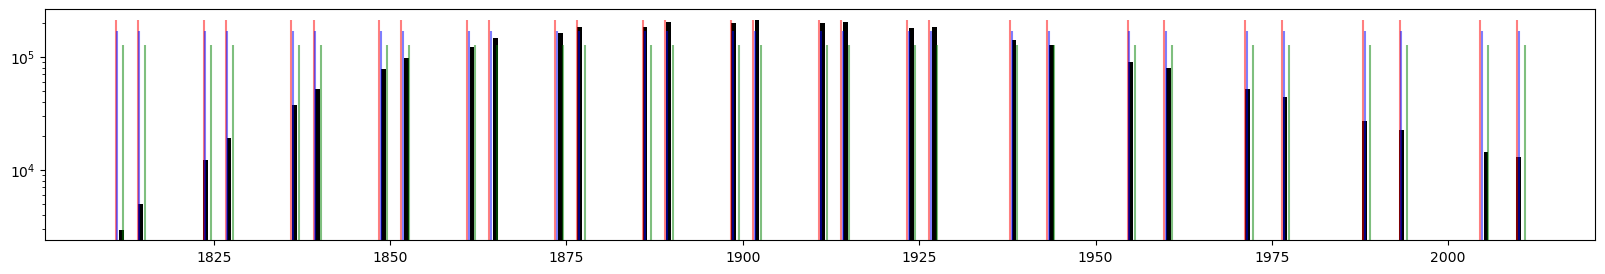

In [3]:
floors, ceilings = floors_ceilings(metadata.layer_bottom_pos_hdf5, metadata.cell_thickness_hdf5, .5)

fig, ax = plt.subplots(figsize=(20, 3))
weights, bins, patches = ax.hist(zs, bins=300, color='k')

high = np.max(weights)
mid = high*0.8
low = high*0.6

ax.vlines(floors, 0, high, color='red', alpha=0.5)
ax.vlines(metadata.layer_bottom_pos_hdf5, 0, mid, color='blue', alpha=0.5)
ax.vlines(ceilings, 0, low, color='green', alpha=0.5)
ax.semilogy()


[]

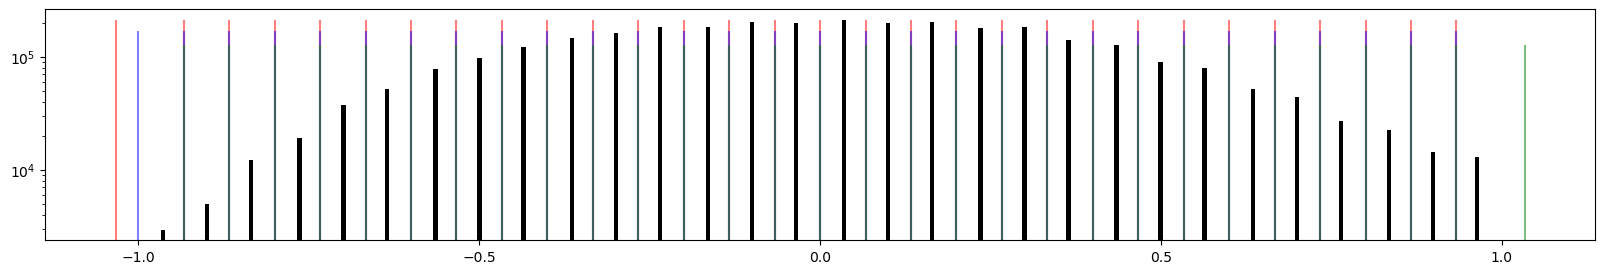

In [4]:
layer_bottom_pos = np.linspace(-1, 1, 31)[:-1]
cell_thickness_global = layer_bottom_pos[1] - layer_bottom_pos[0]
floors, ceilings = floors_ceilings(layer_bottom_pos, cell_thickness_global)

dataset_class = dataset_class_from_config(config)
normed_events = np.copy(events)
dataset_class.normalize_xyze(normed_events)

zs_normed = normed_events[:, :, 2][mask].flatten()

fig, ax = plt.subplots(figsize=(20, 3))
weights, bins, patches = ax.hist(zs_normed, bins=300, color='k')

high = np.max(weights)
mid = high*0.8
low = high*0.6


ax.vlines(floors, 0, high, color='red', alpha=0.5)
ax.vlines(layer_bottom_pos, 0, mid, color='blue', alpha=0.5)
ax.vlines(ceilings, 0, low, color='green', alpha=0.5)
ax.semilogy()

In [5]:
metadata.Zmin

1811

In [6]:
from pointcloud.utils import stats_accumulator
stats_accumulator.read_section_to(config, "temp.h5", 1, 0) 

Reading section 0 of 1
Will read 1000 events of 1000 in total


100%|██████████| 10/10 [00:27<00:00,  2.72s/it]

Saving to temp.h5


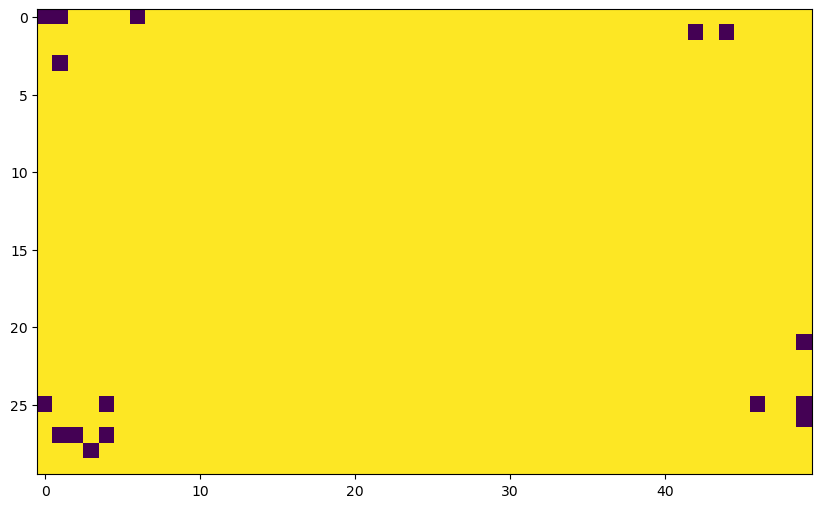

In [7]:
acc = stats_accumulator.StatsAccumulator.load("temp.h5")
yx = np.sum(acc.counts_hist, axis=(0, 3))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(yx>0)